In [3]:
%matplotlib inline
import random
import numpy as np
import torch
from matplotlib import pyplot as plt

In [8]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [9]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-1.8274,  0.0134]) 
label: tensor([0.4924])


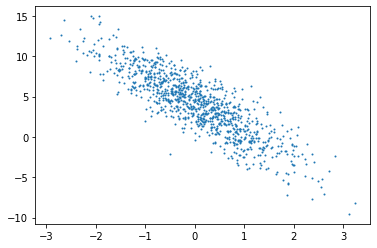

In [10]:
# The semicolon is for displaying the plot only
plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);

In [19]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [20]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5130,  0.0303],
        [ 1.4336, -0.1982],
        [-0.7100, -0.2124],
        [-1.5914, -0.4398],
        [-0.9686,  1.3125],
        [ 1.3225,  0.0691],
        [-1.2102,  0.0880],
        [ 0.7406, -0.4322],
        [-0.2468,  1.6586],
        [ 1.4027,  0.2115]]) 
 tensor([[ 5.1260],
        [ 7.7457],
        [ 3.5020],
        [ 2.5102],
        [-2.1970],
        [ 6.6005],
        [ 1.4844],
        [ 7.1443],
        [-1.9424],
        [ 6.2971]])


In [21]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [22]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [23]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [24]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [25]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        y_pred = net(X, w, b)
        l = loss(y_pred, y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        y_pred_train = net(features, w, b)
        train_l = loss(y_pred_train, labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.050073
epoch 2, loss 0.000220
epoch 3, loss 0.000052


In [31]:
print(y_pred)
print(y_pred_train)

tensor([[-0.0517],
        [-0.1313],
        [ 5.9509],
        [ 1.1215],
        [ 7.3019],
        [ 1.0034],
        [ 5.3391],
        [ 9.9761],
        [ 3.4669],
        [ 2.0609]], grad_fn=<AddBackward0>)
tensor([[ 5.0013e-01],
        [ 2.3437e+00],
        [-3.6683e-01],
        [ 6.7232e+00],
        [-1.1962e+00],
        [ 6.4449e+00],
        [ 7.2084e+00],
        [-6.2591e-01],
        [ 7.1489e+00],
        [ 2.8954e+00],
        [-5.3886e+00],
        [ 1.1897e+01],
        [ 4.8683e-01],
        [ 2.5582e+00],
        [ 7.4033e+00],
        [ 5.7250e+00],
        [ 6.8443e+00],
        [ 1.0916e+01],
        [ 6.2662e+00],
        [ 2.6590e+00],
        [-4.8812e+00],
        [ 8.0320e+00],
        [ 8.2653e+00],
        [ 2.8513e+00],
        [-5.1574e+00],
        [ 3.7823e+00],
        [ 9.3361e+00],
        [ 5.6161e+00],
        [ 7.8847e+00],
        [ 7.1272e+00],
        [ 4.3676e+00],
        [ 8.8547e+00],
        [ 3.2734e+00],
        [ 3.4509e+00],
   

ValueError: x and y must have same first dimension, but have shapes (1000, 2) and (10, 1)

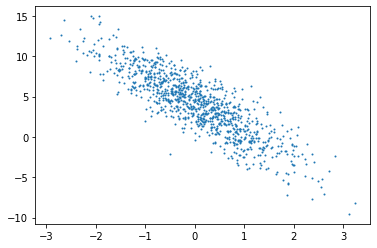

In [33]:
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)
plt.plot(features.detach().numpy(), y_pred.detach().numpy())
plt.show()